# Introduction

## Purpose
The purpose of this JupyterLab Notebook is to conudct a data analysis project for EM-0212: Applied Data Science. The analysis outlined herein will characterize the effort to examine home ownership demographics and the efficacy of local government property tax initiatives with respect to rising out-of-state real estate investment in the coastal Maine town of Harpswell.

## Scope  
The scope of this analysis is limited to records of real estate ownership, sale, and taxation in the rural town of Harpswell, Maine. The data is available in electronic form for the year of 2018 and will form the basis of this investigation. In addition to providing a sense of the current situation, a model to examine the relationship between residency and home value will be developed.

## Background  
The town of Harpswell is a small, rural community on the coast of Maine. For most of its history, Harpswell has depended upon farming and fishing to support its economy. As such, many families have large generational properties situated directly on the coast. However, over the last several decades, the town has become a popular vacation destination for many wealthy families in New England, the rest of the United States, and even abroad. This has caused a dramatic increase in real estate values, with some areas fetching close to 1 million dollars per acre. Families who had lived on the same land for centuries soon found themselves unable to keep up with tax payments and began to move away. As such, many residents of the town felt they were facing a demographic and political crisis. A potential solution  came in the form of lowering the mill rate to approximately 5 dollars per thousand. Although this stymied the outflow of local families, the efficacy of the policy change remains understudied. Indeed, it is unknown whether the trend has been reversed or merely slowed, and there are not any means to investigate the effects of further action available to the town authorities. Additionally, many people in the town harbor ill-will towards "out-of-staters," causing significant tensions within the community. An answer as to whether the trend has been reversed and if nonresident buyers really do buy up properties with greater value is of vital importance to the fabric of the town.

## Investigator's Note  
The investigator of this study had little to no experience with Python and JupyterLabs before initiating this project. As such, the analysis herein is simple, but presents a nonetheless poignant answer to the questions raised within the scope outlined above. In light of this, the investigator elected to include extensive notes on thought process and coding structure in a stream-of-conciousness form to accompany each section of the project. To the trained eye, this may seem redundant, simplistic, or altogether superfluous. However, it serves as a testament to the investigators labor as well as an attempt to rectify the difference between perceived facileness and bona fide effort.

# Gathering Data

## Initialization

In [1042]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import ParameterGrid
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import l1_min_c
from sklearn.metrics import roc_curve, auc
sns.set_context('talk')
sns.set_style('darkgrid')
sns.set_palette('colorblind')

Source 1: Forde, Jessica. Classification Example. .ipynb. JupyterLabs, April 2019. JupyterLabs Notebook file outlining data analysis techniques.

## Read in Main Dataset  
The data to be studied is compiled annually by the Harpswell Town Assessor's Office. The primary dataset forming the basis of this investigation is the 2018 property tax commitment records, available online from the Harpswell town website. These records are available as an Excel spreadsheet and downloadable for free. The data itself is focused on the ownership, taxation, and valuation of real estate within the town. The land value, structure value, and extensive owner information are available on nearly every plot in the town. This will provide a way to thoroughly examine the current state of affairs as well as identify larger trends to utilize for predictions. Though it is extremely comprehensive and granular, the data does have a number of formatting issues and some structural inconsistencies. This is not insurmountable, however, and cleaning the data will almost certainly yield very much useful datasets.

In [1043]:
df = pd.read_excel('http://www.harpswell.maine.gov/vertical/Sites/%7B3F690C92-5208-4D62-BAFB-2559293F6CAE%7D/uploads/2018_COMMITMENT.xlsx')

Source 2: Town of Harpswell, Tax Assessor. Dataset of Real Estate in Harpswell, ME. 2019. Raw data. Harpswell. http://www.harpswell.maine.gov/index.asp?SEC=B8009038-83C1-4082-8297-FFB27C3B4AF0&Type=B_BASIC

Read head of primary dataset to check if it worked.

In [1044]:
df.head()

,RealEstate_ID,Owner_Name,Owner_Name2,Address1,Address2,City,State,Zip,AccountNumber,Land_Value,...,Exemption2,Exemption_Code2,Exemption3,Exemption_Code3,Total Assessed,2018 Taxes,Resident,Property_Location,Zone,Lot_Size
0,001001000000,LOWELL LORRAINE S TRUSTEE,LIBERTY FARM TRUST,25 LOWELL LN,PARKER HEAD,PHIPPSBURG,ME,04562,L2300R,72400,...,0,0,0,0.0,280200,1815.696,N,00056 HARPSWELL NECK RD,IN,3.70
1,001001001000,HARPSWELL HERITAGE LAND TRUST,NaN,PO BOX 359,NaN,HARPSWELL,ME,04079,H0010R,17600,...,0,0,0,0.0,0,0.000,Y,00000 HARPSWELL NECK RD,SR,13.70
2,001002000000,HARPSWELL OF WINTER PARK LLC,NaN,2885 TEMPLE TRAIL,NaN,WINTER PARK,FL,32789,S1510R,381500,...,0,0,0,0.0,752200,4874.256,N,00033 SKOLFIELD PL,SR,3.46
3,001003000000,SOL ERIK C & LARKIN B KEYES,NaN,12B SKOLFIELD PLACE,NaN,HARPSWELL,ME,04079,S1460R,86600,...,0,0,0,0.0,376100,2437.128,N,00012 SKOLFIELD PL,IN,4.94
4,001004000000,HARPSWELL HERITAGE LAND TRUST,NaN,PO BOX 359,NaN,HARPSWELL,ME,04079,B2248R,755400,...,0,0,0,0.0,0,0.000,N,00049 SKOLFIELD PL,SR,18.30


The head of the data indicates that the data was successfully imported. The labels for the dataframe columns are directly from the labels in the Excel document. Of note are several "NaN" values for Owner_Name2 and Address2, indicating that those may be less useful than other parts of the dataset.

## Import Supplementary Dataset  
As with the primary dataset, the data to be utilized for the supplementary dataset is compiled annually by the Harpswell Town Assessor's Office. The supplementary dataset is the 2018 property sale records, available online from the Harpswell town website. These records are available as an Excel spreadsheet and downloadable for free. The data itself is focused on the sale of real estate within the town. The sale price and extensive owner information are available on every real estate parcel sold in the town. This will provide a way to better examine the current state of affairs and provide indicators of trends in a different way than the primary dataset. Though it is extremely comprehensive and granular, the data does have a number of formatting issues and some structural inconsistencies. This can be addressed utilizing data cleaning methods.  
Note: In order to get the correct labels, the skiprows command for read_excel was utilized. This was the result of the first two lines of the Excel document being blank and thus creating unnamed labels.

In [1045]:
dfs = pd.read_excel('http://www.harpswell.maine.gov/vertical/Sites/%7B3F690C92-5208-4D62-BAFB-2559293F6CAE%7D/uploads/TRANSFERS_2019(2).xlsx',skiprows=3)

Source 3: Town of Harpswell, Tax Assessor. Dataset of Real Estate Sales Data in Harpswell, ME. 2019. Raw data. Harpswell.
http://www.harpswell.maine.gov/index.asp?SEC=B8009038-83C1-4082-8297-FFB27C3B4AF0&Type=B_BASIC

Read head of secondary dataset to check if it worked.

In [1046]:
head_dfs = dfs.head()
dfs.head()

,MAP,LOT,SUB,BK/PG,LAST NAME / LLC,FIRST NAME AND OTHERS / TRUST,NEW OWNER ADDRESS,CITY,ST,ZIP,FORMER OWNER,DATE SIGNED,DATE RECORD,SALES AMT,PHYSICAL #,PHYSICAL LOCATION
0,16,390,NaN,34865/301,"379 LISBON ROAD, LLC",NaN,136 MAINE STREET SUITE 5,BRUNSWICK,ME,4011.0,PORTLAND TRUST COMPANY,2018-05-25,2018-05-29,625000,7,BRIDGE VIEW LANE
1,17,30,NaN,35263/174,508 BASIN POINT ROAD LLC,NaN,PO BOX 540,HARPSWELL,ME,4079.0,ESTATE OF DONALD M SAXTON,2018-10-31,2018-11-02,425000,508,BASIN POINT RD
2,54,176,NaN,34941/202,8 HERON LANE LLC,C/O TYLER BRODIE,86 CAMBRIDGE PLACE,BROOKLYN,NY,11238.0,HUNTER MARY & JAMES PARAKILAS,2018-06-20,2018-06-25,252001,8,HERON LANE
3,8,82,NaN,34903/329,815 HARPSWELL NECK ROAD LLC,NaN,126 SKASSEN LN,HARPSWELL,ME,4079.0,17 SKASSEN LLC,2018-06-11,2018-06-12,0,,HARPSWELL NECK RD
4,30,124,NaN,35244/42,9 LINSCOTT LLC,NaN,POBOX 44,ORRS ISLAND,ME,4066.0,JACK & KATHY SYLEVESTER LLC,2018-10-29,2018-10-26,0,9,LOWELL &#39 S COVE RD


The head of the data indicates that the data was successfully imported. The labels for the dataframe columns are directly from the labels in the Excel document. Of note are several "NaN" values for SUB and Others / Trust and Address2, indicating that those may be less useful than other parts of the dataset.

## Initial Data Information, Main Dataset  
In order to get a better sense of the dataset than from the "head," basic Python dataframe information commands will be run on the primary dataset. In this case, the "info" and "describe" commands will be run. A secondary purpose is to give the investigator a better sense of what purpose these two commands serve.

In [1047]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5042 entries, 0 to 5041
Data columns (total 23 columns):
RealEstate_ID        5041 non-null object
Owner_Name           5041 non-null object
Owner_Name2          1235 non-null object
Address1             5040 non-null object
Address2             362 non-null object
City                 5041 non-null object
State                5040 non-null object
Zip                  5037 non-null object
AccountNumber        5041 non-null object
Land_Value           5042 non-null int64
Building_Value       5042 non-null int64
Exemption1           5042 non-null int64
Exemption_Code1      5042 non-null object
Exemption2           5042 non-null int64
Exemption_Code2      5042 non-null object
Exemption3           5042 non-null int64
Exemption_Code3      5041 non-null float64
Total Assessed       5042 non-null int64
2018 Taxes           5042 non-null float64
Resident             5041 non-null object
Property_Location    5038 non-null object
Zone            

,Land_Value,Building_Value,Exemption1,Exemption2,Exemption3,Exemption_Code3,Total Assessed,2018 Taxes,Lot_Size
count,5.042000e+03,5.042000e+03,5.042000e+03,5.042000e+03,5042.000000,5041.000000,5.042000e+03,5.042000e+03,5041.000000
mean,4.131418e+05,3.498957e+05,2.972233e+04,9.687822e+02,6.346688,0.004959,7.323401e+05,4.745564e+03,2.814543
std,1.466683e+07,1.242179e+07,1.060855e+06,3.459617e+04,261.151565,0.211230,2.599791e+07,1.684664e+05,8.999472
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000
25%,6.820000e+04,4.740000e+04,0.000000e+00,0.000000e+00,0.000000,0.000000,1.572250e+05,1.018818e+03,0.380000
50%,1.402500e+05,1.350000e+05,0.000000e+00,0.000000e+00,0.000000,0.000000,2.832500e+05,1.835460e+03,0.950000
75%,2.857000e+05,2.283000e+05,2.000000e+04,0.000000e+00,0.000000,0.000000,4.728000e+05,3.063744e+03,2.100000
max,1.041531e+09,8.820871e+08,7.493000e+07,2.442300e+06,16000.000000,10.000000,1.846229e+09,1.196357e+07,205.800000


From the "info" command, the dataset seems very complete for the most part! Only a few columns have significant gaps and most are within 1 or 2 datapoints from one another. The size of the file is very small at less than 1 MB but there are over 5,000 rows of data. Additionally, there are some 23 columns of data. This explains why the investigator had so much trouble during initial examination of the Excel document.  
Judging by the "describe" command, the data appears to be well-distributed and of relatively normal distribution. It is apparent that some of the columns consist of strings as not all of the columns from "info" are present in the "describe" readout. An important considering is that the maximum of Land_Value, Building_Value, Exemption1, Exemption2, and Total Assessed are much, much greater than the mean of each. Indeed, Land_Value exceeds 1,000,000,000 dollars. It is clear that those are sums of the respective columns and must be removed. To do so, the last row of the dataframe will be removed.

In [1048]:
df.drop(df.tail(1).index,inplace=True)

## Initial Data Information, Supplementary Dataset  
In order to get a better sense of the dataset than from the "head," basic Python dataframe information commands will be run on the supplementary dataset. In this case, the "info" and "describe" commands will be run. A secondary purpose is to give the investigator a better sense of what purpose these two commands serve.

In [1049]:
dfs.info()
dfs.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271 entries, 0 to 270
Data columns (total 16 columns):
MAP                               271 non-null int64
LOT                               271 non-null int64
SUB                               29 non-null object
BK/PG                             271 non-null object
LAST NAME / LLC                   271 non-null object
FIRST NAME AND OTHERS / TRUST     212 non-null object
NEW OWNER ADDRESS                 270 non-null object
CITY                              271 non-null object
ST                                269 non-null object
ZIP                               269 non-null float64
FORMER OWNER                      271 non-null object
DATE SIGNED                       271 non-null datetime64[ns]
DATE RECORD                       271 non-null datetime64[ns]
SALES AMT                         271 non-null int64
PHYSICAL #                        249 non-null object
PHYSICAL LOCATION                 271 non-null object
dtypes: datetime64

,MAP,LOT,ZIP,SALES AMT
count,271.000000,271.000000,269.000000,2.710000e+02
mean,33.848708,90.553506,12354.572491,2.173962e+05
std,18.305919,76.183817,19710.490287,2.936074e+05
min,2.000000,2.000000,1002.000000,0.000000e+00
25%,17.500000,38.000000,4038.000000,0.000000e+00
50%,32.000000,72.000000,4079.000000,9.000000e+04
75%,50.000000,118.000000,7974.000000,3.767000e+05
max,79.000000,504.000000,99712.000000,1.750000e+06


From the "info" command, the dataset seems very complete for the most part! Only a few columns have significant gaps and most are within 1 or 2 datapoints from one another. The size of the file is very small at less than 50 KB but there are over 250 rows of data. Additionally, there are some 16 columns of data.  
Judging by the "describe" command, the data appears to be reasonably well-distributed and of relatively normal distribution. It is apparent, however, that some of the columns consist of strings as not all of the columns from "info" are present in the "describe" readout. Additionally, there does not seem to be nearly as much numerical data in this dataset as there is in the primary dataset. This has important considerations for the future as, in order to use them in tandem, the primary dataset may have to be watered down to match the supplementary dataset.

# Data Cleaning  
From the results above, it is apparent that the data must be cleaned in order to be useable and to rectify the gap in completeness between the primary and supplementary datasets. In order to do so, the primary dataset will be addressed first followed by the secondary dataset. Following this, the two datasets will be merged to create a single dataset to analyze.

## Main Dataset  
The primary dataset will be addressed first as it is significantly cleaner. The plan of the investegator is to elminate clearly useless columns first, before conducting more in-depth explorations of potentially "eliminatable" data columns.

From the head and intial information, it is clear that you can remove all Exemption Codes as they are strings and also are unrelated to real estate itself. Additionally, Exemption2 and Exemption3 are too incomplete to use and should be discarded. Furthermore, RealEstate_ID and AccountNumber can be removed as they are simply organizational numbers and not actually a part of the process itself. City and State can be removed because they are redundant in light of the column "Resident" which answers the question of residency more effectively than city and state. To remove these columns, the "drop" command will be used with axis=1.

In [1050]:
df = df.drop(['RealEstate_ID','Exemption_Code1','Exemption2','Exemption_Code2','Exemption3','Exemption_Code3','AccountNumber','City','State'], axis=1)

Now that this has been completed, a plot of percentage of data missing will be made in order to get a better sense of columns with extensive data loss that were not apparent in the initial analysis.

Text(0.5, 1.0, 'Percent Missing by Variable')

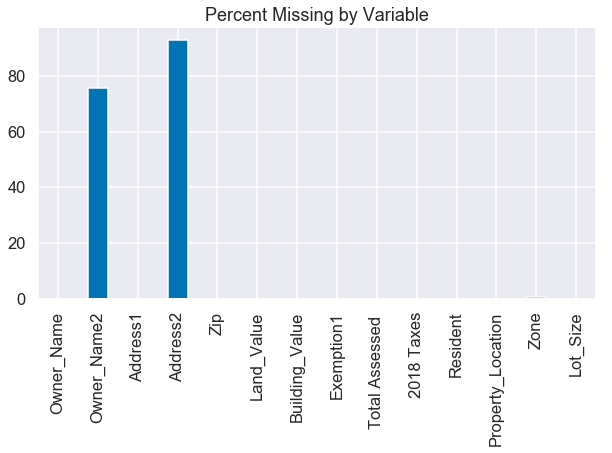

In [1051]:
f, ax = plt.subplots( figsize=(10,5) )
((df.isnull().sum()/len(df)) * 100).plot(kind='bar')
plt.xticks(rotation=90)
plt.title('Percent Missing by Variable')

Source 4: Forde, Jessica. Classification Example. .ipynb. JupyterLabs, April 2019. JupyterLabs Notebook file outlining data analysis techniques.

From the results of the plot, it is clear that Owner_Name2, Address2, and Zone can be dropped as they all have clearly missing data that is not rectifyable. Additionally, Zip can be dropped becasue, although it is complete, it again serves the same purpose of Resident. Here again, the "drop" command will be used followed by another printing of the dataset head in order to get a sense of where the set is at after initial cleaning.

In [1052]:
df = df.drop(['Owner_Name2','Address2','Zip','Zone',], axis=1)
head_df = df.head()
df.head()

,Owner_Name,Address1,Land_Value,Building_Value,Exemption1,Total Assessed,2018 Taxes,Resident,Property_Location,Lot_Size
0,LOWELL LORRAINE S TRUSTEE,25 LOWELL LN,72400,207800,0,280200,1815.696,N,00056 HARPSWELL NECK RD,3.70
1,HARPSWELL HERITAGE LAND TRUST,PO BOX 359,17600,0,17600,0,0.000,Y,00000 HARPSWELL NECK RD,13.70
2,HARPSWELL OF WINTER PARK LLC,2885 TEMPLE TRAIL,381500,370700,0,752200,4874.256,N,00033 SKOLFIELD PL,3.46
3,SOL ERIK C & LARKIN B KEYES,12B SKOLFIELD PLACE,86600,289500,0,376100,2437.128,N,00012 SKOLFIELD PL,4.94
4,HARPSWELL HERITAGE LAND TRUST,PO BOX 359,755400,100100,855500,0,0.000,N,00049 SKOLFIELD PL,18.30


Now that the investegator can actually get a sense of the data (It is not 26 columns anymore!) it is clear that Owner_Name, Address1, and Property_Location are not necessary because of the scope of the problem. The analysis aimes to include the whole town and thus the area within the town is of little importance. These can be deleted using the "drop" command again. Again, the head of the dataset will be printed to get a better sense of the data.

In [1053]:
df = df.drop(['Owner_Name','Address1','Property_Location',], axis=1)
head_df = df.head()
df.head()

,Land_Value,Building_Value,Exemption1,Total Assessed,2018 Taxes,Resident,Lot_Size
0,72400,207800,0,280200,1815.696,N,3.70
1,17600,0,17600,0,0.000,Y,13.70
2,381500,370700,0,752200,4874.256,N,3.46
3,86600,289500,0,376100,2437.128,N,4.94
4,755400,100100,855500,0,0.000,N,18.30


This is now much more manageable and complete so it will be left for the time-being and the supplementary dataset will be addressed.

## Supplementary Dataset


Text(0.5, 1.0, 'Percent Missing by Variable')

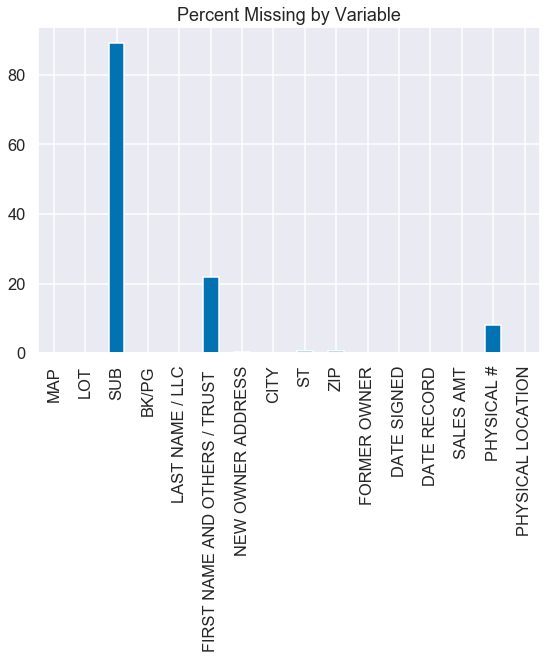

In [1054]:
f, ax = plt.subplots(figsize=(9,6))
((dfs.isnull().sum()/len(dfs)) * 100).plot(kind='bar')
plt.xticks(rotation=90)
plt.title('Percent Missing by Variable')

Source 5: Forde, Jessica. Lecture9-eda. .ipynb. JupyterLabs, April 2019.
JupyterLabs Notebook file outlining various data analysis techniques.

By the chart, there appears to be a lot missing in Sub, Frist Name and Others / Trust, and Physical #. These will be eliminated utilizing the "drop" command. Then the head of the data will be printed again to get a sense of it.

In [1055]:
dfs = dfs.drop(['SUB','FIRST NAME AND OTHERS / TRUST ','PHYSICAL #'], axis=1)
head_dfs = dfs.head()
dfs.head()

,MAP,LOT,BK/PG,LAST NAME / LLC,NEW OWNER ADDRESS,CITY,ST,ZIP,FORMER OWNER,DATE SIGNED,DATE RECORD,SALES AMT,PHYSICAL LOCATION
0,16,390,34865/301,"379 LISBON ROAD, LLC",136 MAINE STREET SUITE 5,BRUNSWICK,ME,4011.0,PORTLAND TRUST COMPANY,2018-05-25,2018-05-29,625000,BRIDGE VIEW LANE
1,17,30,35263/174,508 BASIN POINT ROAD LLC,PO BOX 540,HARPSWELL,ME,4079.0,ESTATE OF DONALD M SAXTON,2018-10-31,2018-11-02,425000,BASIN POINT RD
2,54,176,34941/202,8 HERON LANE LLC,86 CAMBRIDGE PLACE,BROOKLYN,NY,11238.0,HUNTER MARY & JAMES PARAKILAS,2018-06-20,2018-06-25,252001,HERON LANE
3,8,82,34903/329,815 HARPSWELL NECK ROAD LLC,126 SKASSEN LN,HARPSWELL,ME,4079.0,17 SKASSEN LLC,2018-06-11,2018-06-12,0,HARPSWELL NECK RD
4,30,124,35244/42,9 LINSCOTT LLC,POBOX 44,ORRS ISLAND,ME,4066.0,JACK & KATHY SYLEVESTER LLC,2018-10-29,2018-10-26,0,LOWELL &#39 S COVE RD


When considering the scope of the project,  MAP, LOT, BK/PG, LAST NAME/LLC, NEW OWNER ADDRESS, ZIP, FORMWER OWNER, DATE SIGNED, DATE RECORD, and PHYSICAL LOCATION can all be eliminated. This is because they are all either organizational numerics, outside the boundaries of analysis (physical locations), or redundant (as in zip code vs. town of buyer). These will be eliminated with the "drop" command and the head printed again.

In [1056]:
dfs = dfs.drop(['MAP','LOT','BK/PG','LAST NAME / LLC','NEW OWNER ADDRESS','ST','ZIP','FORMER OWNER','DATE SIGNED', 'DATE RECORD','PHYSICAL LOCATION'], axis=1)
head_dfs = dfs.head()
dfs.head()

,CITY,SALES AMT
0,BRUNSWICK,625000
1,HARPSWELL,425000
2,BROOKLYN,252001
3,HARPSWELL,0
4,ORRS ISLAND,0


This is much more managable but extremely, extremely sparse. Note that, unlike the primary dataset, this does not have resident status. Thus,the investigator must conduct this himself. Additionally, the dataset only has sales amount, not acreage or real estate value so currently a land or value comparison cannot be conducted. However, based on literature review, one can assume value equals approximately sale price as it has been demonstrated that adjustments to mill rate get capitalized directly into sale prices.

Source 6:  Palmon, Oded, and Barton A. Smith. "New Evidence on Property Tax Capitalization." Journal of Political Economy 106, no. 5 (1998): 1099-111. Accessed March 5, 2019. https://www.journals.uchicago.edu/doi/pdfplus/10.1086/250041.

## Making Both Datasets Congruous
Now that both datasets have been slimmed down, they must be made congruous before being combined. The investigator's plan to make the datasets congruous involves the establishment of logical values for residency, taxes paid, and exemptions as well as numerical values for land area and valuation for each dataset.

To accomplish the task of creating residency status, the investigator needs to change city into resident or non resident in the supplementary dataset. To do so, the column containing buyer town will be utilized. Note, there are many names for the town of Harpswell, e.g. Orrs Island is an island village within Harpswell. To get a sense of this, a bar plot of the various town names will be created.

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114]),
 <a list of 115 Text xticklabel objects>)

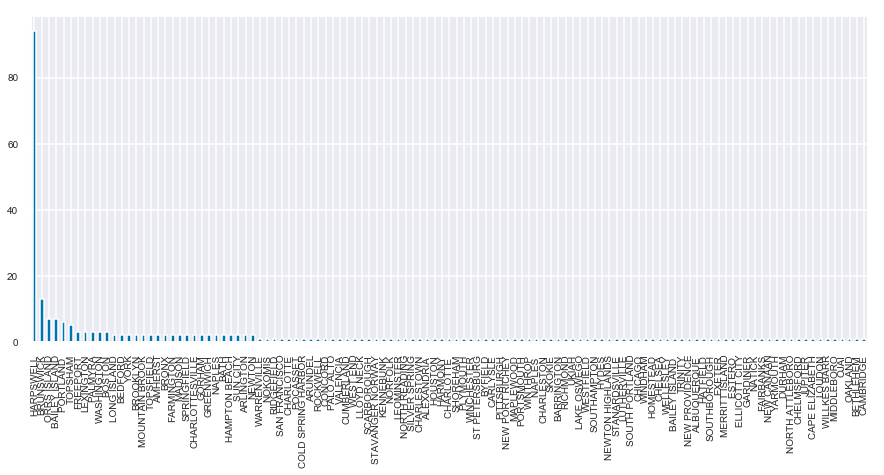

In [1057]:
dfs.CITY.value_counts().plot(kind='bar',figsize=(15,6),fontsize=10)
plt.xticks(rotation=90, horizontalalignment='center')

Source 7:  Forde, Jessica. Classification Example. .ipynb. JupyterLabs, April 2019. JupyterLabs Notebook file outlining data analysis techniques.

This is clearly a ridiculous amount of towns. It would be significantly easier to define a logical value based on ones that mean "Harpswell" rather than try to individual identify and classify those towns that are not "Harpswell." Note that  Harpswell will be defined as town names containing, "Harpswell," "Orrs Island," "Bailey Island," and "Brunswick." Although Brunswick is not part of Harpswell, it is the only town it borders so they are regarded as extremely similar and a singular entity at times. To create the logical column for residency, first the python "loc" command will replace all Harpswell identifiers with "RES." From there, an entirely new column will be created using logic equating "True" with "RES."

In [1058]:
dfs.loc[dfs.CITY == 'HARPSWELL', 'CITY'] = 'RES'
dfs.loc[dfs.CITY == 'BRUNSWICK', 'CITY'] = 'RES'
dfs.loc[dfs.CITY == 'ORRS ISLAND', 'CITY'] = 'RES'
dfs.loc[dfs.CITY == 'BAILEY ISLAND', 'CITY'] = 'RES'
dfs['RESIDENT?'] = dfs['CITY'] == 'RES'

Now that this is complete, print dataset head to check if it worked.

In [1059]:
dfs.head()

,CITY,SALES AMT,RESIDENT?
0,RES,625000,True
1,RES,425000,True
2,BROOKLYN,252001,False
3,RES,0,True
4,RES,0,True


Now residency is a fully logical variable! The investigator will now do the same for the first dataset utilzing a similar process. However, since the resident column is already populated with Y and N indicating Yes and No, the logical column creation is the only step required.

In [1060]:
df['RESIDENT?'] = df['Resident'] == 'Y'

Now that this is complete, print dataset head to check if it worked.

In [1061]:
df.head()

,Land_Value,Building_Value,Exemption1,Total Assessed,2018 Taxes,Resident,Lot_Size,RESIDENT?
0,72400,207800,0,280200,1815.696,N,3.70,False
1,17600,0,17600,0,0.000,Y,13.70,True
2,381500,370700,0,752200,4874.256,N,3.46,False
3,86600,289500,0,376100,2437.128,N,4.94,False
4,755400,100100,855500,0,0.000,N,18.30,False


Now residency is a fully logical variable in the primary dataset as well!

Now that the data is relatively clean and consistent, the datasets need to be prepared for concatenation. To do so, land and building values in the first dataset need to be combined to come up with a total value analagous to the sale price in the supplementary dataset. This will be combined into a new column called "VALUE". Additionally, logical columns for Lot_Size, 2018 Taxes, and Exemption1 will be created with names "AREA", "TAX?", and "EXEMPTIONS?" respectively. Additionally, an average land area and average value will need to be calculated in order to fill in blanks in the supplementary dataset. Lastly, the now-superfluous data columns will be eliminated with "drop."

In [1062]:
df['EXEMPTIONS?'] = df['Exemption1'] > 0
df['TAX?'] = df['2018 Taxes'] > 0
l = len(df.Lot_Size)
s = sum(df.Lot_Size)
df['VALUE'] = df['Land_Value'] + df['Building_Value']
df['AREA'] = df['Lot_Size']

lV = len(df.VALUE)
sV = sum(df.VALUE)

avg_Area = s/l
print(avg_Area)

avg_Val = sV/lV
print(avg_Val)

df = df.drop(['Exemption1','Total Assessed ','2018 Taxes','Resident','Land_Value','Building_Value','Lot_Size'], axis=1)

2.814542749454472
381594.4653838524


Now that this is complete, print dataset head to check if it worked.

In [1063]:
df.head()

,RESIDENT?,EXEMPTIONS?,TAX?,VALUE,AREA
0,False,False,True,280200,3.70
1,True,True,False,17600,13.70
2,False,False,True,752200,3.46
3,False,False,True,376100,4.94
4,False,True,False,855500,18.30


From above, the supplementary dataset has some gaps and is also missing tax, exemption, and area data. However, there is hope! Indeed, the gaps in value can be filled by assuming that they are of the average value for the town overall, assuming the sales are a random sample. Additionally, given the nature of the supplementary dataset itself, the investigator can assume that all properties being sold WILL pay taxes and NOT be exempt. Furthermore, the area can be assumed to be the average of the first dataset as the sale dataset is assumed to be a random sample of the town overall. In order to create these columns, an exempt column and tax column will be created and then logical columns named "EXEMPTIONS?" and "TAX?" based on them will be made. Then, a "VALUE" column will be created from the extant "Sales AMT" column. Additionally, an "AREA" column will be created based on the average area. Then, using a mask and "loc" command, 0 values in the "VALUE" column will be replaced with the average value. Lastly, the redundant columns will be eliminated with "drop".

In [1064]:
dfs['exempt'] = 0
dfs['EXEMPTIONS?'] = dfs['exempt'] == 1
dfs['tax'] = 1
dfs['TAX?'] = dfs['tax'] != 0
dfs['VALUE'] = dfs['SALES AMT']
dfs['AREA'] = avg_Area

mask = dfs.VALUE == 0
column_name = 'VALUE'
dfs.loc[mask, column_name] = avg_Val

dfs = dfs.drop(['CITY','SALES AMT','exempt','tax'], axis=1)


Now that this is complete, print dataset head to check if it worked.

In [1065]:
dfs.head()

,RESIDENT?,EXEMPTIONS?,TAX?,VALUE,AREA
0,True,False,True,625000.000000,2.814543
1,True,False,True,425000.000000,2.814543
2,False,False,True,252001.000000,2.814543
3,True,False,True,381594.465384,2.814543
4,True,False,True,381594.465384,2.814543


Now both datasets have the same structure and consistent, clean values. They must now be concatenated with the "concat" command. However, in order to make sure the index does not start at 0 again at the point of concatenation, the .reset_index(drop=True) command must be appended to the end.

In [1066]:
dfMerge = pd.concat([df,dfs]).reset_index(drop=True)

Now the datasets have been merged and dfMerge represents the full dataset!

# Initial Data Analysis  
To get a cursory sense of what the data says with respect to the project goals, a box plot of the dataset will be created.

Text(0.5, 1.0, 'Merged Dataset Box Plot of Value ($) vs. Residency Status')

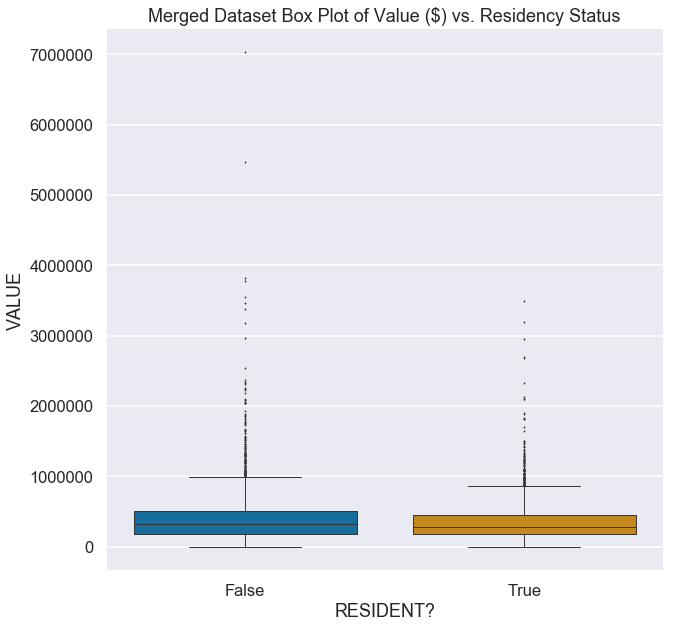

In [1067]:
f, ax = plt.subplots(figsize=(10, 10))
sns.boxplot(x="RESIDENT?", y="VALUE", data=dfMerge, fliersize=1, linewidth=1, ax=ax).set_title('Merged Dataset Box Plot of Value ($) vs. Residency Status')

Source 8: Forde, Jessica. Lecture9-eda. .ipynb. JupyterLabs, April 2019.
JupyterLabs Notebook file outlining various data analysis techniques.

This seems to support the assumptions of residents that people from out of state buy up the expensive homes in town and, by that action, increase the value of real estate overall. However, to better tease out this notion box plots of the two original datasets must be constructed as well. This will allow the investigator to get a better sense if this is a trend or simply due to the fact that wealthier people tend to purchase more expensive homes.

Text(0.5, 1.0, 'Supplementary Dataset Box Plot of Value ($) vs. Residency Status')

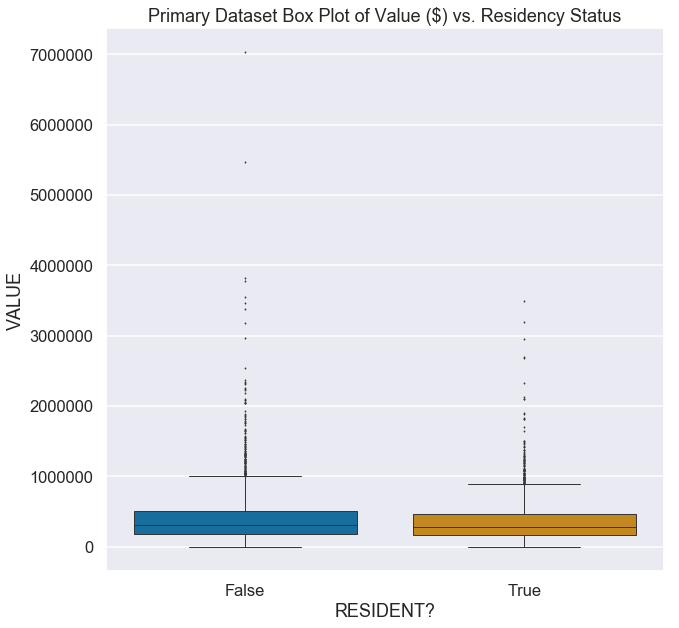

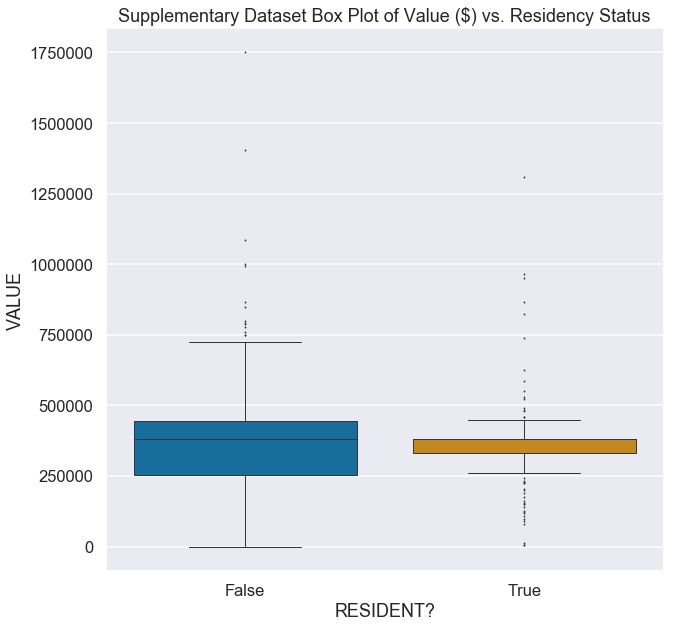

In [1068]:
f, ax = plt.subplots(figsize=(10, 10))
sns.boxplot(x="RESIDENT?", y="VALUE", data=df, fliersize=1, linewidth=1, ax=ax).set_title('Primary Dataset Box Plot of Value ($) vs. Residency Status')
f, ax = plt.subplots(figsize=(10, 10))
sns.boxplot(x="RESIDENT?", y="VALUE", data=dfs, fliersize=1, linewidth=1, ax=ax).set_title('Supplementary Dataset Box Plot of Value ($) vs. Residency Status')

The individual plots show that, indeed, nonresidents are purchasing real estate at values higher than their present average value. This can be seen in the fact that the sales data (supplementary dataset) has a higher nonresident value mean than the primary dataset (current real estate holding data) nonresident value mean. This shows that nonresidents are pushing real estate value higher and purchasing at rates above current value. Additionally, the disparity between nonresidents and residents is more pronounced in sales with the difference between nonresident and resident mean value higher than in current real estate holding data.

In order to broaden the data analysis, all factors in the dataset must be examined simultaneously with regards to their residency predictive power. The answer to this is Random Forest Analysis, conducted next.

# Random Forest Analysis  
In order to conduct Random Forest Analysis, the investigator must covert the dataset to entirely logical values. To do so, a column "VALUE_LOG" will be created which is simply the boolean of "VALUE" being less than or equal to average value. The same will be conducted for area with a new column "AREA_LOG" and based on less than avg_Area.

In [1069]:
dfMerge['VALUE_LOG'] = dfMerge['VALUE'] > avg_Val
dfMerge['AREA_LOG'] = dfMerge['AREA'] > avg_Area

Now that logical columns have been created for each facet under study, the random forest analysis can be conducted. Start by splitting up training and test data on a 75/25 basis.

In [1070]:
train_vars = ['EXEMPTIONS?','TAX?','VALUE_LOG','AREA_LOG']

trX, teX, trY, teY = train_test_split(dfMerge[train_vars],dfMerge['RESIDENT?'], test_size = 0.25)

After doing this conduct normalized random forest.

In [1071]:
rf = RandomForestClassifier()
param_dist = {"n_estimators": stats.randint(2, 300), "max_features": ['sqrt',  'log2'], "min_samples_split": stats.randint(5, 50),"bootstrap": [True, False],"criterion": ["gini", "entropy"]}
random_rf = RandomizedSearchCV(rf, param_distributions=param_dist,n_iter=20, cv=5, verbose=1, n_jobs=-1)
random_rf.fit(trX, trY)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   13.5s finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid='warn', n_iter=20, n_jobs=-1,
          param_distributions={'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1388267b8>, 'max_features': ['sqrt', 'log2'], 'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x13c83a668>, 'bootstrap': [True, False], 'criterion': ['gini', 'entropy']},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=1)

Note: This analysis relied heavily on a modified version of an example within the "Classification Example.ipynb" file provided by Jessica Forde as a class example (See Source 9 Below)

Source 9: Forde, Jessica. Classification Example. .ipynb. JupyterLabs, April 2019. JupyterLabs Notebook file outlining data analysis techniques.

Now that random forest has been conducted, compare to test data.

In [1072]:
random_rf.score(teX, teY)

0.7213855421686747

Between 70-75% (the usual result) is a reasonably good value and reflects a fairly strong predictive power. Now plot the random forest results to see what the most important normalized feature.

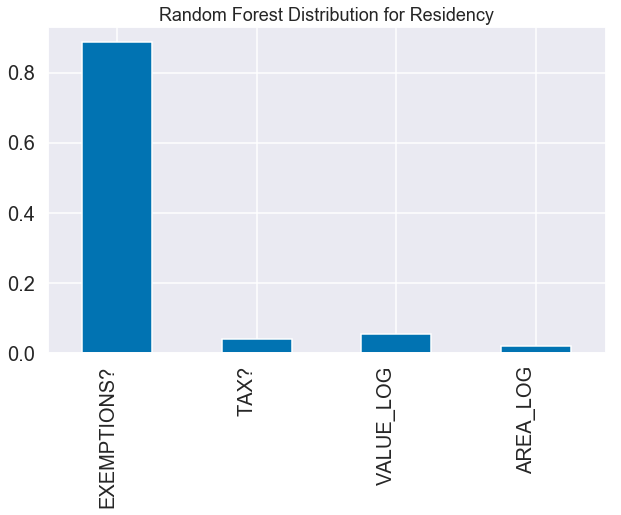

In [1073]:
ax = pd.DataFrame(random_rf.best_estimator_.feature_importances_).plot(kind='bar',fontsize=20,figsize=(10,6))
ax.set_title('Random Forest Distribution for Residency')
ax.set_xticklabels(train_vars, rotation = 90, ha="right")
ax.get_legend().remove()

Note: After this result, the investigator did further research and realized that exemption is heavily skewed because of nonprofits and community institutions such as the town hall and dump. These are subject to exemptions but also sit on large and valuable property and are, naturally, "owned" by residents. Thus, "EXEMPTIONS?" should be removed and the random forest reevaluated.

Re-split training and test data, still on 75/25 basis.

In [1074]:
train_vars2 = ['TAX?','VALUE_LOG','AREA_LOG']

trX2, teX2, trY2, teY2 = train_test_split(dfMerge[train_vars2],dfMerge['RESIDENT?'], test_size = 0.25)

After doing this conduct normalized random forest with exemption removed.

In [1075]:
rf2 = RandomForestClassifier()
param_dist2 = {"n_estimators": stats.randint(2, 300), "max_features": ['sqrt',  'log2'], "min_samples_split": stats.randint(5, 50),"bootstrap": [True, False],"criterion": ["gini", "entropy"]}
random_rf2 = RandomizedSearchCV(rf2, param_distributions=param_dist2,n_iter=20, cv=5, verbose=1, n_jobs=-1)
random_rf2.fit(trX2, trY2)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   12.6s finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid='warn', n_iter=20, n_jobs=-1,
          param_distributions={'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x13e768048>, 'max_features': ['sqrt', 'log2'], 'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x13fcfdcc0>, 'bootstrap': [True, False], 'criterion': ['gini', 'entropy']},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=1)

Note: As with the first random forest analysis, this iteration relied heavily on a modified version of an example within the "Classification Example.ipynb" file provided by Jessica Forde as a class example (See Source 10 Below)

Source 10:  Forde, Jessica. Classification Example. .ipynb. JupyterLabs, April 2019. JupyterLabs Notebook file outlining data analysis techniques.

Now that random forest has been conducted, compare to test data.

In [1076]:
random_rf2.score(teX2, teY2)

0.5406626506024096

This (Between 50-55% usually) is a much worse predictive score and thus calls into question the power of the prediction. However, it does not mean that it is useless. Again, plot the random forest results to see what the most important normalized feature.

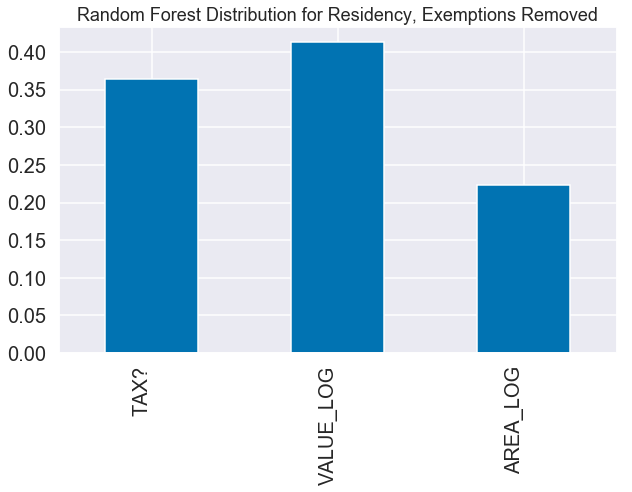

In [1077]:
ax2 = pd.DataFrame(random_rf2.best_estimator_.feature_importances_).plot(kind='bar',fontsize=20,figsize=(10,6))
ax2.set_title('Random Forest Distribution for Residency, Exemptions Removed')
ax2.set_xticklabels(train_vars2, rotation = 90, ha="right")
ax2.get_legend().remove()

This shows that home value is the most important feature in predicting residency. This indicates that an increased real estate value is a more important predictor for resident status compared to whether taxes are paid and much more important than size of lot.

After finishing random forest analysis, the data analysis portion of this report is complete.

# Conclusion  
The data indicates that the average real estate value for nonresidents is significantly higher than that of residents. Additionally, the sale prices indiciate that the gap between residents and nonresidents is widening. The random forest analysis directly links real estate valuation with prediction of residency. Based on the previous results it indicates that valuation of real estate is an indicator of residency with nonresidents enjoying significantly higher values thereof. Thus, it can be concluded that nonresidents tend to not only own real estate that is significantly more valuable than residents, but that they contribute directly to a trend of increasing sale prices and increased values across the board. However, it should be noted that the predictive power of the random forest model linking value to residency is not particularly good and the findings require further investigation.

# Reflections  
The investigator for this project had absolutely no experience with Python beforehand. Thus, he relied heavily upon the lecture and notes provided by Prof. Forde cited in the document. In the future it would be a good idea to better evaluate the power of the random forest analysis and perhaps investigate other correlation prediction models such as regression analysis. Furthermore, data is available as far back as 2014 in the exact same form as presented here. Utilizing five years of data instead of one would be more effective in teasing out trends and allow for stronger predictions and stronger conclusions.